In [74]:
# from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
import os
plt.style.use('Solarize_Light2')

hunt = pd.read_csv('Data\\Hunt\\huntfile.csv')
khar = pd.read_csv('Data\\Kharchenko\\kharchenkofile.csv')
dias = pd.read_csv('Data\\Dias\\diasfile.csv')
xmatch = pd.read_csv('Data\\Hunt\\xmatchfile.csv')

"""In case you want to use fits files"""
# def datahandler(filename):
#     authorname = filename.split('\\')
#     hdul = fits.open(filename)
#     hdr1 = hdul[0].header #first and second header
#     hdr2 = hdul[1].header
#     data, cols = hdul[1].data, hdul[1].columns
#     metadata = [ [ hdr2[f"TTYPE{i+1}"], hdr2.comments[f"TTYPE{i+1}"] ] for i, j in enumerate(cols.names) ]
#     # mydict[authorname]['hdul'] = hdul
#     return hdul[1].data, hdul[1].columns, metadata

xmatch

,ID,NameLit,SourceCat,TypeSourceCat,Sep,SepTidal,SepTidalLit,SepTidalData,pmRASep,pmRASigma,pmDESep,pmDESigma,PlxSep,PlxSigma,maxSigma,meanSigma
0,0,1636-283,Kharchenko+13,hipparcos,0.000298,0.002366,0.003970,0.002366,3.4450,0.662721,1.69600,0.3213,0.04456,0.0,0.663,0.3280
1,0,1636-283,Kharchenko+13,position,0.000298,0.002366,0.003970,0.002366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2MASS-GC01,Bica+18,position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2MASS-GC02,Bica+18,position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2MASS-GC02,Kharchenko+13,"position,hipparcos",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29940,7162,vdBergh_85,Kharchenko+13,position,0.009891,0.024375,0.076088,0.024375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29941,7162,vdBergh_85,Dias+02,position,0.010300,0.025379,0.308965,0.025379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29942,7163,vdBergh_92,Kharchenko+13,position,0.089140,0.185433,0.356566,0.185433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29943,7163,vdBergh_92,Cantat-Gaudin+20,gaia_dr2,0.032700,0.068013,0.145961,0.068013,0.1545,0.527101,0.03532,0.0000,0.03385,0.0,0.527,0.1757


### Getting Kharchenko numbers
Kharchenko clusters: $n_\mathrm{clusters}=2935 $, $n_\mathrm{detected}= 1513 \newline$ 
Steps:
1. Get Kharchenko from crossmatch table
2. Remove records with Sep (seperation between cluster centres) == NaN
3. Check if crossmatched kharchenko 

In [75]:
kharchenko_xm = xmatch.query('SourceCat == "Kharchenko+13"').dropna(subset=['Sep']) #Get crossmatch table with seperation=NaN removed
kharchenko_names_oc = np.array(khar.query('Type != "g"')['Name'], dtype=object) #get clusters names from kharchenko data with type is not 'g'=globular

IDs_hunt = np.unique(hunt.ID.values)
IDs_xm = np.unique(kharchenko_xm.ID.values)


In [76]:
#remove duplicates
type(kharchenko_xm)
kharchenko_xmnodup = kharchenko_xm.drop_duplicates(subset=['ID'], inplace=False) 


In [77]:
#sort out the globular clusters in the hunt and kharchenko file

hunt_oc = hunt.loc[hunt['Type'] == 'o']
khar_nonglob = khar.loc[khar['Type'] != 'g']



In [78]:
#merge the two

kharhunt = pd.merge(kharchenko_xmnodup, hunt_oc, on= 'ID', how='inner')



In [79]:
#merge on literature names
kharmerge = pd.merge(kharhunt, khar_nonglob, left_on= 'NameLit', right_on='Name', how='inner' )



In [80]:
#merge on allnames
khar_expanded = kharhunt.assign(synonym=kharhunt['AllNames'].str.split(',')).explode('synonym')
allnamemerge = pd.merge(khar_expanded, khar_nonglob, left_on= 'synonym', right_on='Name', how='inner' )
allnamemerge

,ID,NameLit,SourceCat,TypeSourceCat,Sep,SepTidal,SepTidalLit,SepTidalData,pmRASep,pmRASigma,...,e_rc,rt_y,e_rt,k,e_k,Src,SType,[Fe/H],e_[Fe/H],o_[Fe/H]
0,114,ASCC_10,Kharchenko+13,hipparcos,0.164400,0.031312,0.310144,0.031312,1.0470,0.274158,...,0.69,8.95,4.21,2.55,0.55,COCD,NaN,99.999,9.99,0
1,50,ASCC_100,Kharchenko+13,position,0.025990,0.008916,0.071212,0.008916,NaN,NaN,...,0.28,3.25,0.49,86.95,24.65,COCD,NaN,99.999,9.99,0
2,51,ASCC_101,Kharchenko+13,position,0.025590,0.008428,0.051181,0.008428,NaN,NaN,...,0.55,4.84,2.31,6.11,1.78,COCD,NaN,99.999,9.99,0
3,5400,ASCC_103,Kharchenko+13,position,0.048860,0.017086,0.174505,0.017086,NaN,NaN,...,0.26,6.90,3.25,8.13,2.60,COCD,NaN,99.999,9.99,0
4,52,ASCC_104,Kharchenko+13,position,0.063640,0.043635,0.159102,0.043635,NaN,NaN,...,1.51,7.74,1.10,15.43,10.04,COCD,NaN,99.999,9.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,7165,vdBergh_130,Kharchenko+13,position,0.073390,0.307565,0.638192,0.307565,NaN,NaN,...,0.27,5.31,2.05,3.87,1.31,DIAS,NaN,99.999,9.99,0
1509,7160,vdBergh_80,Kharchenko+13,position,0.028140,0.026219,0.216444,0.026219,NaN,NaN,...,0.21,8.79,3.70,6.41,2.44,DIAS,NaN,99.999,9.99,0
1510,7161,vdBergh_83,Kharchenko+13,position,0.114700,0.154470,0.955673,0.154470,NaN,NaN,...,0.17,7.34,4.74,8.88,5.93,DIAS,NaN,99.999,9.99,0
1511,7162,vdBergh_85,Kharchenko+13,hipparcos,0.009891,0.024375,0.076088,0.024375,0.2275,0.043188,...,0.25,5.00,0.86,6.28,1.22,DIAS,NaN,99.999,9.99,0


In [81]:
#try and get all 2935 kharchenko clusters
khar_open = khar.loc[~khar['Type'].isin(['a', 'm', 's'])]
khar_open



,MWSC,Name,Type,n_Type,RAhour,DEdeg,GLON,GLAT,r0,r1,...,e_rc,rt,e_rt,k,e_k,Src,SType,[Fe/H],e_[Fe/H],o_[Fe/H]
0,1,Berkeley_58,NaN,NaN,0.0045,60.933,116.750,-1.326,0.025,0.087,...,0.25,13.66,3.31,5.19,1.00,COCD,NaN,99.999,9.99,0
1,2,NGC_7801,NaN,NaN,0.0055,50.727,114.717,-11.331,0.015,0.070,...,0.33,9.93,6.14,2.67,1.44,DIAS,NaN,99.999,9.99,0
2,3,FSR_0459,NaN,NaN,0.0085,59.242,116.446,-2.990,0.018,0.055,...,0.21,7.65,4.63,5.62,3.53,DIAS,irc,99.999,9.99,0
3,4,Stock_18,NaN,NaN,0.0265,64.625,117.617,2.266,0.010,0.050,...,0.03,2.14,0.38,355.57,56.43,DIAS,NaN,99.999,9.99,0
4,5,Berkeley_59,NaN,NaN,0.0373,67.425,118.219,5.001,0.035,0.115,...,0.06,6.51,0.74,153.96,12.16,COCD,NaN,99.999,9.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,3780,Frolov_1,NaN,NaN,23.9570,61.623,116.555,-0.581,0.017,0.040,...,0.16,6.01,4.09,7.87,6.78,COCD,NaN,99.999,9.99,0
3002,3781,NGC_7790,NaN,NaN,23.9730,61.198,116.579,-1.021,0.025,0.060,...,0.30,14.63,3.09,4.32,0.59,COCD,NaN,99.999,9.99,0
3003,3782,NGC_7795,NaN,NaN,23.9606,60.083,116.261,-2.093,0.030,0.037,...,1.04,14.78,5.62,0.49,0.13,DIAS,non,99.999,9.99,0
3004,3783,FSR_0460,NaN,NaN,23.9848,60.694,116.561,-1.532,0.020,0.045,...,0.59,16.85,6.90,0.88,0.28,DIAS,irc,99.999,9.99,0


In [82]:
#find the 1422 clusters that have not been confirmed (i can find 1545 when i turn everything into arrays. I will try to get that number)

values_to_remove = allnamemerge.synonym

khar_notfound = khar_open[~khar_open['Name'].isin(values_to_remove)]
khar_notfound





,MWSC,Name,Type,n_Type,RAhour,DEdeg,GLON,GLAT,r0,r1,...,e_rc,rt,e_rt,k,e_k,Src,SType,[Fe/H],e_[Fe/H],o_[Fe/H]
1,2,NGC_7801,NaN,NaN,0.0055,50.727,114.717,-11.331,0.015,0.070,...,0.33,9.93,6.14,2.67,1.44,DIAS,NaN,99.999,9.99,0
2,3,FSR_0459,NaN,NaN,0.0085,59.242,116.446,-2.990,0.018,0.055,...,0.21,7.65,4.63,5.62,3.53,DIAS,irc,99.999,9.99,0
8,9,IRAS_00013+6817,NaN,NaN,0.0664,68.565,118.595,6.091,0.010,0.055,...,0.33,5.69,2.54,1.69,0.61,BIEM,irc,99.999,9.99,0
9,14,FSR_0504,NaN,NaN,0.0970,81.840,121.227,19.116,0.010,0.045,...,0.19,10.62,4.26,5.03,2.46,FPOS,NaN,99.999,9.99,0
10,16,BDB_94,r,c,0.1120,65.629,118.332,3.154,0.015,0.045,...,0.08,4.52,2.52,34.14,26.76,BIEM,irc,99.999,9.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3774,Harvard_21,NaN,NaN,23.9037,61.740,116.209,-0.386,0.020,0.030,...,0.11,6.01,1.40,11.37,3.40,DIAS,non,99.999,9.99,0
2997,3775,FSR_0440,NaN,NaN,23.9101,50.142,113.682,-11.709,0.015,0.043,...,0.86,16.41,4.65,0.55,0.13,FPOS,NaN,99.999,9.99,0
2998,3776,Czernik_45,NaN,NaN,23.9305,64.620,117.011,2.386,0.010,0.028,...,0.19,6.49,1.18,7.31,1.13,DIAS,dub,99.999,9.99,0
3001,3780,Frolov_1,NaN,NaN,23.9570,61.623,116.555,-0.581,0.017,0.040,...,0.16,6.01,4.09,7.87,6.78,COCD,NaN,99.999,9.99,0


In [112]:
#function to change column to numpy array and plot

def DFplot(df, col1, col2=None):
 
    if col2 is None:
            values = df[col1]
            if values.dtype == 'object':
                 values.value_counts(sort=False).plot(kind='bar')
                 plt.xlabel(col1)
                 plt.ylabel('counts')
                 plt.title(f'Histogram of {col1}')
                 plt.grid(True)
                 plt.savefig(f'./Data/PlotKharchenko/Hist/{col1}.pdf', format='pdf', bbox_inches='tight')
                 plt.show()

            else:
                plt.hist(values, bins=20)
                plt.xlabel(col1)
                plt.ylabel('counts')
                plt.title(f'Histogram of {col1}')
                plt.grid(True)
                plt.savefig(f'./Data/PlotKharchenko/Hist/{col1}.pdf', format='pdf', bbox_inches='tight')
                plt.show()
    else:
            # Extracting columns for scatter plot
        x_values = df[col1]
        y_values = df[col2]
        if x_values.dtype == 'object':
            print(f'{x_values} is a string')
            pass
        elif y_values.dtype == 'object':
            print(f'{y_values} is a string')
            pass
        else:
            plt.scatter(x_values, y_values, s=2)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'Scatter Plot of {col1} vs {col2}')
            plt.grid(True)
            plt.savefig(f'./Data/PlotKharchenko/Scatter/{col1}vs{col2}.pdf', format='pdf', bbox_inches='tight')
            plt.show()



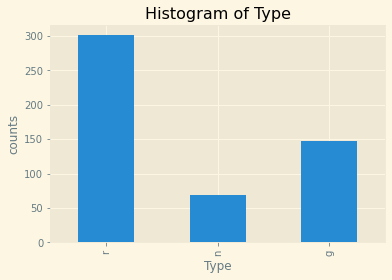

In [116]:
DFplot(khar_notfound, khar_notfound.columns[2])

#khar_notfound['Type'].value_counts(sort=False).plot(kind='bar')

In [119]:
for column_name in khar_notfound.columns:
    DFplot(khar_notfound, khar_notfound[column_name])

'MWSC'